In [158]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import datetime

def parser(x):
    d = datetime.strptime(x, '%b %d, %Y')
    return d

data = pd.read_csv("SP500.csv", index_col=0, usecols=["Date", "Price"], parse_dates=[0], date_parser=parser)
data['Price'] = data['Price'].str.replace(',','').astype(float)
data = data.reindex(index=data.index[::-1])

# data_2 = pd.read_csv("USD_CNY.csv", index_col=0, usecols=["Date", "Price"], parse_dates=[0], date_parser=parser)
# data_2 = data_2.reindex(index=data_2.index[::-1])

print(data.head())
# print(data_2.head())

              Price
Date               
2007-10-14  1500.63
2007-10-21  1535.28
2007-10-28  1509.65
2007-11-04  1453.70
2007-11-11  1458.74


In [150]:
data.index

DatetimeIndex(['2008-10-12', '2008-10-19', '2008-10-26', '2008-11-02',
               '2008-11-09', '2008-11-16', '2008-11-23', '2008-11-30',
               '2008-12-07', '2008-12-14',
               ...
               '2019-08-04', '2019-08-11', '2019-08-18', '2019-08-25',
               '2019-09-01', '2019-09-08', '2019-09-15', '2019-09-22',
               '2019-09-29', '2019-10-06'],
              dtype='datetime64[ns]', name='Date', length=574, freq=None)

In [151]:
data.index = pd.to_datetime(data.index)

In [152]:
data.head()

,Price
Date,
2008-10-12,940.55
2008-10-19,876.77
2008-10-26,968.75
2008-11-02,930.99
2008-11-09,873.29


In [153]:
data.index

DatetimeIndex(['2008-10-12', '2008-10-19', '2008-10-26', '2008-11-02',
               '2008-11-09', '2008-11-16', '2008-11-23', '2008-11-30',
               '2008-12-07', '2008-12-14',
               ...
               '2019-08-04', '2019-08-11', '2019-08-18', '2019-08-25',
               '2019-09-01', '2019-09-08', '2019-09-15', '2019-09-22',
               '2019-09-29', '2019-10-06'],
              dtype='datetime64[ns]', name='Date', length=574, freq=None)

In [154]:
data[pd.isnull(data['Price'])]

,Price
Date,


In [155]:
data.head()

,Price
Date,
2008-10-12,940.55
2008-10-19,876.77
2008-10-26,968.75
2008-11-02,930.99
2008-11-09,873.29


In [156]:
import chart_studio
chart_studio.tools.set_credentials_file(username='aishlia', api_key='9m80xSKucsJrkBQMipcb')

In [126]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
# , freq = 253
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

/Users/jnai/anaconda3/lib/python3.7/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



'https://plot.ly/~aishlia/153/'

In [127]:
import chart_studio.plotly as ply

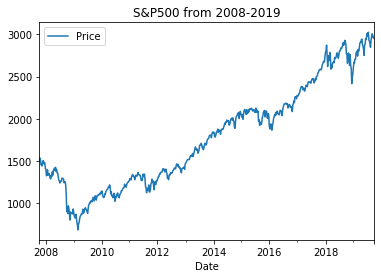

In [159]:
data.plot(title="S&P500 from 2008-2019")

In [160]:
from pmdarima import auto_arima

In [210]:
# exogenous=data_2
# exogenous=exogenous
# seasonal=True
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=6, max_q=6, m=52,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=5926.398, BIC=5948.152, Fit time=40.035 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=6149.155, BIC=6157.857, Fit time=1.781 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=5984.875, BIC=6002.279, Fit time=16.065 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=5925.344, BIC=5942.747, Fit time=26.896 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=5925.258, BIC=5947.012, Fit time=23.264 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=5985.431, BIC=6002.835, Fit time=25.458 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 52); AIC=5923.687, BIC=5949.792, Fit time=127.486 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 52); AIC=5923.817, BIC=5954.273, Fit time=156.674 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 52); AIC=5926.122, BIC=5947.877, Fit time=114.240 seconds
Fit ARIMA: order=

In [211]:
stepwise_model.aic()

5923.6865115104165

## Train Test Split

In [212]:
data.head()

,Price
Date,
2007-10-14,1500.63
2007-10-21,1535.28
2007-10-28,1509.65
2007-11-04,1453.70
2007-11-11,1458.74


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 626 entries, 2007-10-14 to 2019-10-06
Data columns (total 1 columns):
Price    626 non-null float64
dtypes: float64(1)
memory usage: 29.8 KB


In [229]:
train = data.loc['2007-10-14':'2017-12-31'] # '2017-12-31'

In [230]:
train.tail()

,Price
Date,
2017-12-03,2651.50
2017-12-10,2675.81
2017-12-17,2683.34
2017-12-24,2673.61
2017-12-31,2743.15


In [231]:
test = data.loc['2018-01-07':] # 2018-01-07

In [232]:
test.head()

,Price
Date,
2018-01-07,2786.24
2018-01-14,2810.30
2018-01-21,2872.87
2018-01-28,2762.13
2018-02-04,2619.55


In [233]:
test.tail()

,Price
Date,
2019-09-08,3007.39
2019-09-15,2992.07
2019-09-22,2961.79
2019-09-29,2952.01
2019-10-06,2970.27


In [234]:
test_length = len(test)
test_length

92

In [235]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 2, 52), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [236]:
future_forecast = stepwise_model.predict(n_periods=test_length)

In [237]:
future_forecast

array([2731.14070601, 2743.02255795, 2754.38476763, 2759.84344169,
       2774.75522046, 2782.79095136, 2791.80573699, 2815.48226597,
       2827.16960021, 2851.5203126 , 2863.28563199, 2873.43477255,
       2879.38947667, 2895.77048747, 2914.91986882, 2912.61220216,
       2920.46980463, 2912.17921916, 2928.468381  , 2930.70593714,
       2947.13279853, 2947.56493987, 2942.20679791, 2945.1218791 ,
       2964.37971479, 2981.57541836, 3011.74531934, 3015.22644218,
       3018.23250113, 3017.82980894, 3019.91290611, 3023.62149687,
       3027.3082365 , 3039.82260378, 3055.78400292, 3057.73750791,
       3044.25122197, 3042.80221228, 3057.98905726, 3063.68291762,
       3090.17951174, 3097.73301896, 3095.33532163, 3094.91867376,
       3123.78333733, 3149.6879427 , 3156.34959844, 3155.02956496,
       3180.64598171, 3191.82595756, 3197.20192597, 3195.05545074,
       3192.73197354, 3205.9920564 , 3216.61577666, 3228.34503435,
       3246.10197302, 3255.11388952, 3263.49989547, 3284.59945

In [238]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

In [239]:
future_forecast.head()

,Prediction
Date,
2018-01-07,2731.140706
2018-01-14,2743.022558
2018-01-21,2754.384768
2018-01-28,2759.843442
2018-02-04,2774.755220


In [240]:
test.head()

,Price
Date,
2018-01-07,2786.24
2018-01-14,2810.30
2018-01-21,2872.87
2018-01-28,2762.13
2018-02-04,2619.55


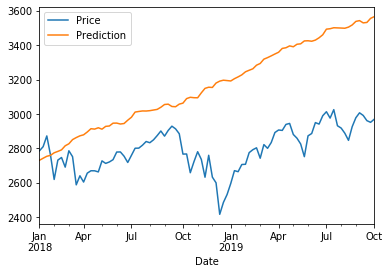

In [241]:
pd.concat([test,future_forecast],axis=1).plot()

In [242]:
future_forecast2 = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])#future_forcast

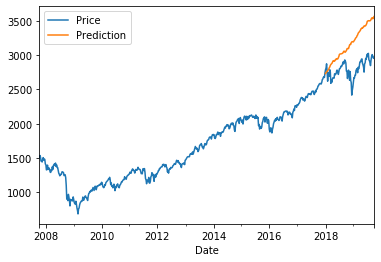

In [243]:
pd.concat([data,future_forecast2],axis=1).plot()